In [2]:
import pandas as pd
import ta

In [11]:
data ={
    "Week":[1,2,3,4,5],
    "Demand":[100,110,95,120,115]
}


In [15]:
import pandas as pd
import numpy as np

data = {
    'Week': [1, 2, 3, 4, 5],
    'Demand': [100, 110, 95, 120, 115]
}

df = pd.DataFrame(data)
df.set_index('Week', inplace=True)

df['SMA'] = df['Demand'].rolling(window=3).mean()
df['Forecast_SMA'] = df['SMA'].shift(1)

df['Error_SMA'] = df['Demand'] - df['Forecast_SMA']
df['Abs_SMA'] = df['Error_SMA'].abs()
df['Square_SMA'] = df['Error_SMA'] ** 2

df['Naive'] = df['Demand'].shift(1)
df['Error_Naive'] = df['Demand'] - df['Naive']
df['Abs_Naive'] = df['Error_Naive'].abs()
df['Square_Naive'] = df['Error_Naive'] ** 2

mad_sma = df['Abs_SMA'].dropna().mean()
mse_sma = df['Square_SMA'].dropna().mean()

mad_naive = df['Abs_Naive'].dropna().mean()
mse_naive = df['Square_Naive'].dropna().mean()

print(df[['Demand', 'Forecast_SMA', 'Error_SMA', 'Abs_SMA', 'Square_SMA',
          'Naive', 'Error_Naive', 'Abs_Naive', 'Square_Naive']])

print("\nMAD & MSE:")
print(f"SMA - MAD: {mad_sma:.4f}, MSE: {mse_sma:.4f}")
print(f"Naive - MAD: {mad_naive:.4f}, MSE: {mse_naive:.4f}")


      Demand  Forecast_SMA  Error_SMA    Abs_SMA  Square_SMA  Naive  \
Week                                                                  
1        100           NaN        NaN        NaN         NaN    NaN   
2        110           NaN        NaN        NaN         NaN  100.0   
3         95           NaN        NaN        NaN         NaN  110.0   
4        120    101.666667  18.333333  18.333333  336.111111   95.0   
5        115    108.333333   6.666667   6.666667   44.444444  120.0   

      Error_Naive  Abs_Naive  Square_Naive  
Week                                        
1             NaN        NaN           NaN  
2            10.0       10.0         100.0  
3           -15.0       15.0         225.0  
4            25.0       25.0         625.0  
5            -5.0        5.0          25.0  

MAD & MSE:
SMA - MAD: 12.5000, MSE: 190.2778
Naive - MAD: 13.7500, MSE: 243.7500


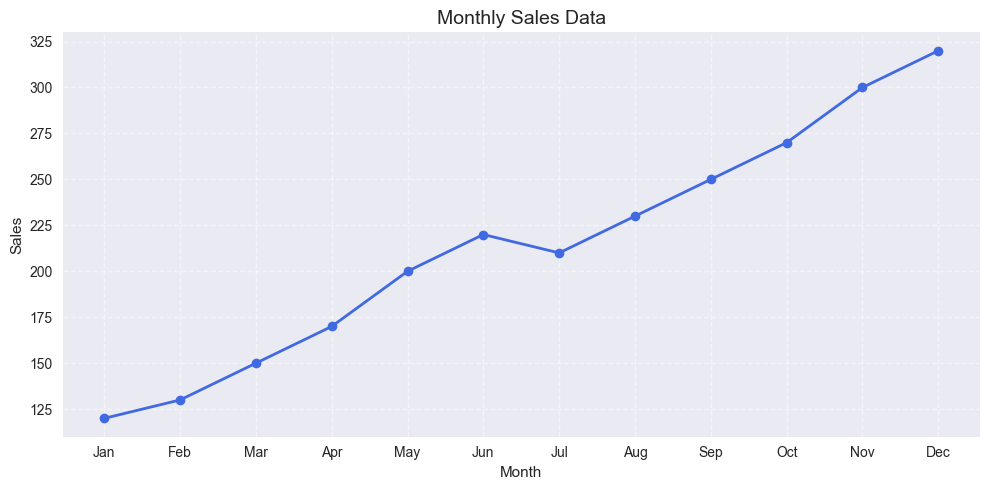

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales = [120, 130, 150, 170, 200, 220,
         210, 230, 250, 270, 300, 320]

plt.figure(figsize=(10, 5))
plt.plot(months, sales, marker='o', linestyle='-', color='royalblue', linewidth=2)

plt.title('Monthly Sales Data', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


In [ ]:
df = pd.DataFrame(data)
df = df.set_index('Week')

df['SMA_3'] = df['Demand'].rolling(window=3).mean()

df['Error'] = df['Demand'] - df['SMA_3']
df['Abs_Error'] = df['Error'].abs()
df['Squared_Error'] = df['Error'] ** 2

print(df)


      Demand       SMA_3      Error  Abs_Error  Squared_Error
Week                                                         
1        100         NaN        NaN        NaN            NaN
2        110         NaN        NaN        NaN            NaN
3         95  101.666667  -6.666667   6.666667      44.444444
4        120  108.333333  11.666667  11.666667     136.111111
5        115  110.000000   5.000000   5.000000      25.000000


In [4]:
df = pd.DataFrame(data)
df

,Week,Demand
0,1,100
1,2,110
2,3,95
3,4,120
4,5,115


In [7]:
import pandas as pd
import numpy as np

# Ví dụ dữ liệu demand theo tuần (tuần 1 đến 6)
data = {
    'Week': [1, 2, 3, 4, 5, 6],
    'Demand': [20, 21, 19, 23, 18, 22]
}
df = pd.DataFrame(data)
df = df.set_index('Week')         # Đặt tuần làm index
demand = df['Demand']             # Series demand

# (a) 3-period Simple Moving Average (SMA) forecasts for weeks 4–6
sma = demand.rolling(window=3).mean()        # SMA thực tế, dựa vào tuần hiện tại và 2 tuần trước
sma_forecasts = sma.shift(1)                 # Forecast = SMA của 3 tuần trước đó

# Extract forecasts for weeks 4, 5, 6
F4 = sma_forecasts.iloc[3]   # tuần 4 = vị trí index 3 (tuần thứ 4)
F5 = sma_forecasts.iloc[4]
F6 = sma.iloc[-1]            # Forecast tuần 6 = SMA của tuần 3,4,5 (tuần cuối cùng)

print("SMA Forecasts:")
print(f"F4 = {F4:.2f}, F5 = {F5:.2f}, F6 = {F6:.2f}")

# (b) Compute MAD and MSE for SMA (tuần 4 và 5)
actuals = demand.iloc[3:5]              # Tuần 4,5 actual
sma_pred = sma_forecasts.iloc[3:5]      # Forecast tuần 4,5

mad_sma = np.mean(np.abs(actuals - sma_pred))
mse_sma = np.mean((actuals - sma_pred) ** 2)

print(f"\nSMA - MAD: {mad_sma:.2f}, MSE: {mse_sma:.2f}")

# (c) Naive forecast: forecast = demand tuần trước
naive_forecasts = demand.shift(1)            # Dịch xuống 1
naive_pred = naive_forecasts.iloc[3:5]       # Forecast tuần 4,5
mad_naive = np.mean(np.abs(actuals - naive_pred))
mse_naive = np.mean((actuals - naive_pred) ** 2)

print(f"\nNaive - MAD: {mad_naive:.2f}, MSE: {mse_naive:.2f}")

# (d) So sánh
if mad_sma < mad_naive and mse_sma < mse_naive:
    print("\nSMA performs better based on both MAD and MSE.")
elif mad_sma > mad_naive and mse_sma > mse_naive:
    print("\nNaive forecast performs better based on both MAD and MSE.")
else:
    print("\nMixed results: one method is better in MAD, the other in MSE.")


SMA Forecasts:
F4 = 20.00, F5 = 21.00, F6 = 21.00

SMA - MAD: 3.00, MSE: 9.00

Naive - MAD: 4.50, MSE: 20.50

SMA performs better based on both MAD and MSE.
